## Imports

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd


import tensorflow as tf
from tensorflow.keras import layers

## EDA (Exploratory Data Analysis)

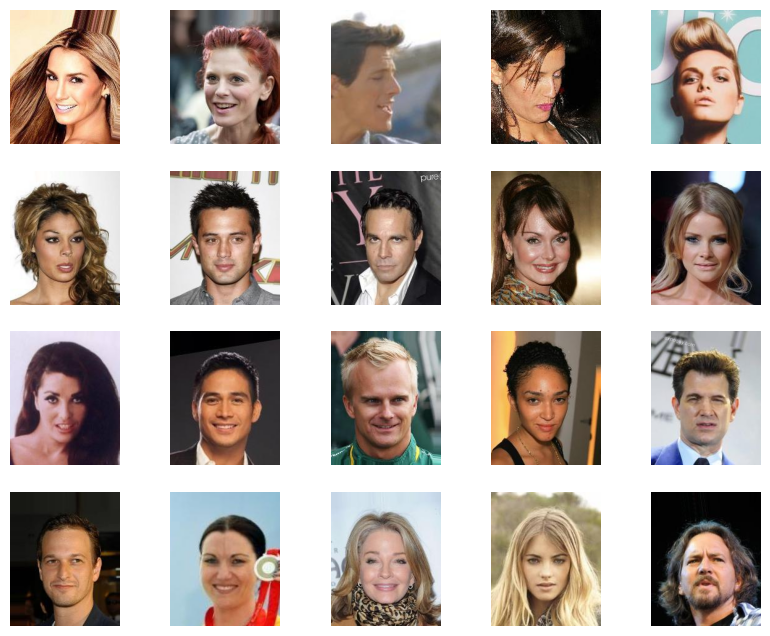

In [2]:
# Set the directory path where the images are located
directory_path = os.environ['DATASET_PATH']

# Get a list of all the image files in the directory
image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.jpg')]

# Sort the list of image files by name (optional)
image_files.sort()

# Create a subplot grid with 4 rows and 5 columns
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))

# Loop through the first 20 images and display them in the subplot grid
for i in range(20):
    if i >= len(image_files):
        break
    img = imread(image_files[i])
    row = i // 5
    col = i % 5
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

# Display the subplot grid
plt.show()


In [3]:
print ('Number of images:', len(image_files))

202599


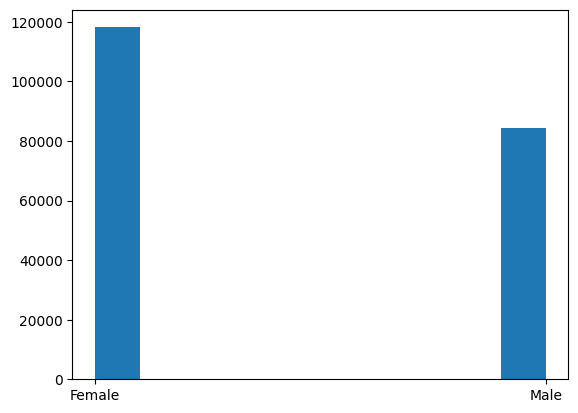

In [4]:
path = os.environ['CSVPATH']

# Load data from CSV file
df = pd.read_csv(path)

classes = {-1: 'Female', 1: 'Male'}

plt.hist(list(map(lambda x: classes[x] , df['Male'])))
plt.show()

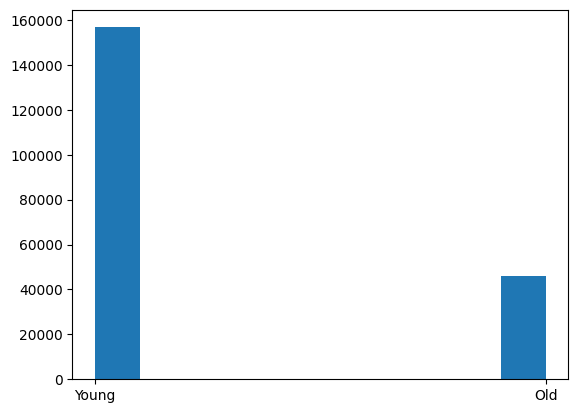

In [5]:
classes = {-1: 'Old', 1: 'Young'}

plt.hist(list(map(lambda x: classes[x] , df['Young'])))
plt.show()

## Models

### Discriminator

In [6]:
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

In [7]:
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 128)       0         
                                                                 
 flatten (Flatten)           (None, 131072)            0

### Generator

In [8]:
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(32*32*512, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((32, 32, 512)),
        layers.Conv2DTranspose(256, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')
    ])

    return model

In [9]:
generator = make_generator_model()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 524288)            52428800  
                                                                 
 batch_normalization (BatchN  (None, 524288)           2097152   
 ormalization)                                                   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 524288)            0         
                                                                 
 reshape (Reshape)           (None, 32, 32, 512)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      3276800   
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)     